In [50]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rainbow
import os
import glob

## Import the jsonified transactions into a dataframe

In [3]:
path = '/Users/Sarah/galvanize/dsi-capstone/jsons/'
all_files = glob.glob(os.path.join(path, "*.json"))

In [6]:
df = pd.concat((pd.read_json(f,keep_default_dates=False,lines=True) for f in all_files)) 

## Import just one day into a dataframe 

In [3]:
df=pd.read_json('./jsons/1.json',keep_default_dates=False,lines=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 10 columns):
date      2535 non-null object
gross+    2535 non-null float64
gross-    2535 non-null float64
items     2535 non-null object
net       2535 non-null float64
oper      2535 non-null int64
term      2535 non-null int64
time      2535 non-null object
trans     2535 non-null int64
type      2535 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 198.1+ KB


In [258]:
item_dict = defaultdict(int)
for basket in df['items']:
    for item in basket:
        #print (item[1])
        item_dict[item[1]] += 1


In [133]:
stopwords = list([i[0] for i in Counter(item_dict).most_common(50)])

In [202]:
for key,value in item_dict.items():
    if value <5:
        stopwords.append(key)

In [203]:
#stopwords = []
items = []
for basket in df['items']:
    for item in basket:
        #print (item[1])
        if item[1] in stopwords:
            continue
        else:
            items.append(item[1])
items_set=set(items)


In [204]:
len(items_set)

1078

In [205]:
df.shape[0]

2535

In [206]:
item_matrix = np.zeros((df.shape[0],len(items_set)))

In [207]:
len(items_set)

1078

In [208]:
df_items= pd.DataFrame(item_matrix,columns=items_set)

In [209]:
df_items.shape

(2535, 1078)

In [210]:
df.shape

(2535, 6586)

In [211]:
df.index

RangeIndex(start=0, stop=2535, step=1)

In [212]:
df=df.reset_index()

In [213]:
df.index

RangeIndex(start=0, stop=2535, step=1)

In [214]:
#df.describe()

In [215]:
df.pop('index')
print ()

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Columns: 6586 entries, date to SB GREEN RIPE OLIV
dtypes: float64(6579), int64(3), object(4)
memory usage: 127.4+ MB


In [217]:
df.iloc[:,0].index


RangeIndex(start=0, stop=2535, step=1)

In [218]:
df_items.iloc[:,0].index

RangeIndex(start=0, stop=2535, step=1)

In [219]:
#df_items.index = list(df_items.index)

In [220]:
#df=pd.concat([df,df_items],axis=1)

In [221]:
#df=df.drop(columns='Gift Card Reload',axis=1)

In [222]:
'''for items in items_set:
    df[items] = 0'''

'for items in items_set:\n    df[items] = 0'

In [223]:
df['items'].head()

0    [[, MINTS PEPPERMINT, 2.69, 15], [, KONA DEEP ...
1    [[, BLUEBERRIES, 5.99, 12], [, ALXNDRE YOGURT,...
2    [[, CRV SMALL NO TAX, 0.05, 15], [MP, Worker 2...
3    [[, CRV LRG SING NOTAX, 0.1, 15], [MP, Worker ...
4    [[, GF 7 GRAIN BREAD, 5.89, 17], [, SMALL COOL...
Name: items, dtype: object

In [224]:
col_index_dict = dict(zip(items_set, range(len(items_set))))

In [225]:
'''#example of putting one item into the matrix
i = 0
for item in df['items'][i]:
    print( item )
    print( i, col_index_dict[ item[1] ], item[2] )
    print(df.iloc[i, col_index_dict[ item[1] ]])
    print()
df['items'][0][0][2]
type(df.iloc[0,6000])
type(df.iloc[0,6000])+df['items'][0][0][2]
for item in df['items'][0]:
    print(type(item[2]))
    print(item)
'''

"#example of putting one item into the matrix\ni = 0\nfor item in df['items'][i]:\n    print( item )\n    print( i, col_index_dict[ item[1] ], item[2] )\n    print(df.iloc[i, col_index_dict[ item[1] ]])\n    print()\ndf['items'][0][0][2]\ntype(df.iloc[0,6000])\ntype(df.iloc[0,6000])+df['items'][0][0][2]\nfor item in df['items'][0]:\n    print(type(item[2]))\n    print(item)\n"

In [226]:
matrix = np.zeros(df_items.shape)
matrix.shape

(2535, 1078)

In [227]:
matrix[0,600]

0.0

In [228]:
#iterate through all rows and insert value of item at row of basket and column of item
for i in range(df.shape[0]):
    for item in df['items'][i]:
        #print( item )
        #print( i, col_index_dict[ item[1] ], item[2] )
        
        #set matrix to boolean for item precence in basket:
        if item[1] not in stopwords and item[2] > 0:
            matrix[i,col_index_dict[ item[1] ]] = 1
        if item[1] not in stopwords and item[2] < 0:
            matrix[i,col_index_dict[ item[1] ]] = 0
        
        #set matrix value to total of item price per basket:
        #matrix[i,col_index_dict[ item[1] ]] = matrix[i,col_index_dict[ item[1] ]] + item[2]
        
        
        #df.iat[i,col_index_dict[ item[1] ]] = df.iloc[i,col_index_dict[ item[1] ]] + item[2]
        #print(item[2])
        #print(i)
        #print()

In [229]:
matrix.shape

(2535, 1078)

In [230]:
matrix[matrix<0]=0

In [231]:
spare_matrix = sparse.csr_matrix(matrix)

In [232]:
spare_matrix

<2535x1078 sparse matrix of type '<class 'numpy.float64'>'
	with 9255 stored elements in Compressed Sparse Row format>

In [233]:
from sklearn.decomposition import NMF

In [234]:
model = NMF(n_components=10)

In [235]:
W = model.fit_transform(spare_matrix)

In [236]:
H=model.components_

In [237]:
W.shape

(2535, 10)

In [238]:
H.shape

(10, 1078)

In [239]:
list(items_set)[1000]

'4105 QUICK OATS'

In [240]:
feature_names=list(items_set).copy()
n_top_words=10
for topic in H:
    print(topic.argsort()[:-n_top_words - 1:-1])
    print ([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])
    print()

[932 626 991 570 815 864 277 583 859 933]
['POTATOES GARNET', 'MUSHROOMS SHIITAKE', 'CAULIFLOWER CELLO', 'POTATOES JAPANESE', 'BRUSSEL SPROUTS', 'TOMATOES CLUSTER', 'CABBAGE RED', 'BOK CHOY BABY', 'MIX CHERRY TOMATO', 'BROCCOLI BABY SWEE']

[727 108 559 981 969 694   4 873 903 679]
['CRV 12PACK SMLL T', 'APPLES PINK LADY', 'POTATOES RUSSET', 'SQUASH BUTTERNUT', 'LACROIX GRPFRT12pk', 'SMALL REF CRV TAX', 'MANGO', 'PEPPERS GREEN BELL', 'STRAUS MILK 64oz', 'eggs clover lg dz']

[ 559  661  843  569 1000  958    6  956  719  924]
['POTATOES RUSSET', '2580 NUTRI YEAST', '8571 TURM PWD ORG', 'PARMIGIANO REGG', '4105 QUICK OATS', '8087 CARD PWD OG', 'WILDWOOD 16oz TOFU', '8237 ORG GINGER PW', 'DISH LIQUID 25oz', '2863 BTR CHOC CHIP']

[333 800 646 545 306 815 527 847 149 305]
['TOMATO MIX HEIRLOO', 'LEMONS MEYER', 'RASPBERRY', 'APPLES GALA', 'PEPPERS ORANGE BEL', 'BRUSSEL SPROUTS', '2448 CASTEL OLIVE', 'PEPPERS YELLOW BEL', 'LETTUCE ROMAINE', '6PACK BEER SMALL C']

[108 306 847 732 278 554  9

## Topic by boolean precense of item in basket:

[1147 4830 6457 2337 2779 4184 5590 4177  176 2437]
['BAG CREDIT', 'CRV LRG SING NOTAX', '4110 ORG RLD OATS', 'PARADISO VINTAGE', 'CRV SMALL NO TAX', 'PACKAGED FOOD', 'BAKERY', 'BOTTLE DEPOSIT', 'KALE DINO', 'REFRIGERATED']

[4218  261 4175 5573 2605  176 1928 3590 5623 5323]
['ONIONS YELLOW', 'CELERY', 'CARROTS LOOSE', 'PEPPERS RED BELL', 'SQUASH ZUCCHINI', 'KALE DINO', 'BROCCOLI LOOSE', 'BEANS GREEN', 'ONIONS GREEN', 'CAULIFLOWER CELLO']

[1051 4830 6540 2779 3176 2605 4177 2337  284 3949]
['SF Bag Charge', 'CRV LRG SING NOTAX', 'CRV SMALL SING T', 'CRV SMALL NO TAX', 'LARGE COOLER CRV', 'SQUASH ZUCCHINI', 'BOTTLE DEPOSIT', 'PARADISO VINTAGE', 'CRV LRG SING T', '10% Vitamin TX']

[5843 2247 4718  454 4830 3594 6457  413 3166  527]
['BANANAS', 'ORANGES NAVEL', 'BLUEBERRIES', 'APPLES PINK LADY', 'CRV LRG SING NOTAX', 'POTATOES GARNET', '4110 ORG RLD OATS', 'APPLE HONEYCRISP', 'WHOLE ORG MILK', 'CUCUMBERS']

[3782 3176 4830 2521 1854 3910 4718 4554 2303 2437]
['SMALL COOLER CRV', 'LARGE COOLER CRV', 'CRV LRG SING NOTAX', 'LEMONS', 'PAC CULT DRK STORM', 'SMALL REF CRV TAX', 'BLUEBERRIES', 'Worker 20% Refrig', 'BAGEL', 'REFRIGERATED']

[2954 4554 3834  862 5651 1744 6540 3385 1759 3774]
['Worker 20% PkgFood', 'Worker 20% Refrig', 'Worker 20% Produce', 'Worker 20% Bakery', 'Worker 20% Bulk', 'Worker 20% Cheese', 'CRV SMALL SING T', 'Worker 20% Sundrie', 'Worker 20% BeerWin', 'Worker 20% Frozen']

[6188 5573 1809 4503 4718  520  722 3594  527  723]
['AVOCADOS HASS', 'PEPPERS RED BELL', 'CILANTRO', 'LIMES', 'BLUEBERRIES', 'PEPPERS ORANGE BEL', 'PEPPER CHILI', 'POTATOES GARNET', 'CUCUMBERS', 'LEMONS MEYER']

[ 929 5394 1415 3828 4503 2358 2521 3776 6264  124]
['8 OZ BIO TUB t3', '16OZ BIO TUB t4', '2448 CASTEL OLIVE', 'SUGAR PLUM CLAM', 'LIMES', 'CARROTS BUNCH', 'LEMONS', 'LETTUCE SALAD MIX', '5352 ALMOND BUTTER', 'TOMATO MIX HEIRLOO']

[5509 4619 3765 2521 1498 4503 4218 1809 2934  178]
['GARLIC WHITE', 'GINGER', 'ONIONS RED', 'LEMONS', 'SHALLOTS', 'LIMES', 'ONIONS YELLOW', 'CILANTRO', 'TOMATOES ROMA', 'PARSLEY ITALIAN']

[5639 3591 2168 2358 5275 2247 3186 5836 3281 3590]
['APPLES FUJI', 'SATSUMA MANDARIN', 'PEAR BOSC', 'CARROTS BUNCH', 'KIWI LOOSE', 'ORANGES NAVEL', 'GRAPEFRUIT', 'POTATOES YELLOW', '5290 WALNUTS', 'BEANS GREEN']

## topics by total dollar amount of item per basket:

[4861 6575 2194 2185 2186 2187 2188 2189 2190 2191]
['Gift Card Reload', '4465 MUGI MISO', 'NL Cran Acid 16oz', '3154 DRD CHERRIES', '2186 UNPEELED FAVA', 'GINGER BITTERS', '4113 SINTO KIMCHI', 'FAKIN BACON', 'M5 Razor Handle', 'WILDBRINE JPN']

[ 841 3930 3211  920 3098 4061  210  986 5199 4588]
['CHEESE', 'CA LEMON OIL', 'ANDANTE CROTTIN', 'GARLIC EVOO', 'BLACK BETTY', 'STRAUS GREEK YOGUR', 'TOMATO MIX HEIRLOO', 'CAPRETA NF', 'MF Blood Builder 3', 'LEMONS MEYER']

[1776 4897  291 2810 4832 5323 5560 1969 2629 2258]
['HP Valerian 4oz', 'HP Calif Poppy 4oz', 'STRAWBERRY 1LB PKG', 'AMERIBELLA', 'AVOCADOS HASS', 'RASPBERRY', 'POTATOES JAPANESE', 'SF Bag Charge', 'BLUEBERRIES', 'SR Mycrobiome Men']

[3155 4445 6191 5372 3064 2219 2781 3229 2700 4764]
['GI Turmeric 120cap', 'Blueberry Cleanser', 'Indian Meadow Eye', 'PEASANT PIE GARBAN', '6087VEGAN RAVIOLI', 'INDIAN BENTO', 'DOG WASTE BAGS', '2432 EQUAL EX COFF', 'BIOKULT PINOT NOIR', '3715 GOJI GRANOLA']

[4595 5934 2195 4690  108 4814  425 5032 1551 3534]
['Tw Org Choc Whey', 'Luminos', 'PEPERMINT HAND SOA', 'JUMBO DZ BURRO', 'Volume Shampoo 12o', 'PARMIGIANO REGG', 'NO Theanine 100mg9', 'SIGHT GLASS', 'HP Maca 60vcap', 'WF Peppermint TP']

[4457 1765  317 2987 2571 5099 5571 6194 4012  718]
['Earth yoga mat', 'Hot Water Bottle T', 'DrB COCO OIL 30oz', 'COWGIRL MT TAM', 'MEREDITH FETA', 'BUBBIES SPICY DILL', '8167 DANDELION RST', 'MORNIN GLORY PRUNE', 'STRAUS PLN YOG QT', 'BANANAS']

[2093 4688 3208 4868 1564  939  739  933 6401  106]
['KIND PNUTCHOCOBAR', 'LACROIX GRPFRT12pk', 'COCONOLA GRANOLA', 'FIELDS HONEY GRANO', 'POPART NORI POPCRN', 'NWMN VAN CREME CKY', 'WHITE CHEDDAR POPC', 'cadia KETTLE CORN', 'UNSWT ALMND BRZ 64', 'TULSI LEMON GINGER']

[5909 4596 4130 6004 3456 3131 2334 3891 3055 1265]
['Hf VitaMinGreen500', 'HF Earth 500gram', 'SG Melatonin 10mg', 'BLACKBERRY PACK', 'NW Aloelax 100cap', 'PARADISO VINTAGE', 'HALO CHO ICRM', 'DIVINE 85% DK CHOC', 'KEVITA MB GINGER', '4324 GRIZZ GRANOLA']

[4971  325 4832 2463   48 1497 3219 5495 2655  718]
['PRODUCE', 'LIL GEM LETTUCE', 'AVOCADOS HASS', '5290 WALNUTS', '5250 ORG PECAN HA', 'ARTICHOKES', 'Frantoia Olive Oil', 'SATSUMA MANDARIN', 'APPLES FUJI', 'BANANAS']

[2347 2756 5235 1836 5829 3832 6135 1294  495  385]
['NC PerfectPrenat 1', '32OZ COCONUT H2O', 'GoLMCT32oz', 'Sea Buckthorn Oil', 'PrmlKchnCollPept16', 'SLINGSHOT DRINK', 'NAVITAS GOJI 16oz', 'GL SuperSeed 600g', 'Camellia Seed Oil', 'Coconut Skin Food']


In [241]:
H.max()

2.833638497635178

In [242]:
H[:,1].argsort()[-10:][::-1]

array([3, 7, 0, 1, 8, 2, 9, 6, 5, 4])

In [243]:
model

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [244]:
len(list(items_set))

1078

Topic #0:
['POTATOES GARNET', 'MUSHROOMS SHIITAKE', 'CAULIFLOWER CELLO', 'POTATOES JAPANESE', 'BRUSSEL SPROUTS', 'TOMATOES CLUSTER', 'CABBAGE RED', 'BOK CHOY BABY', 'MIX CHERRY TOMATO', 'BROCCOLI BABY SWEE', 'APPLE HONEYCRISP', 'RASPBERRY', 'LEEKS', 'EGGS DZ ROCK LG', 'CARA CARA NAVEL', 'JUMBO DZ BURRO', '3080 MEDJOOL DATES', 'LETTUCE RED ROMAIN', 'CABBAGE NAPA', 'COLLARDS']


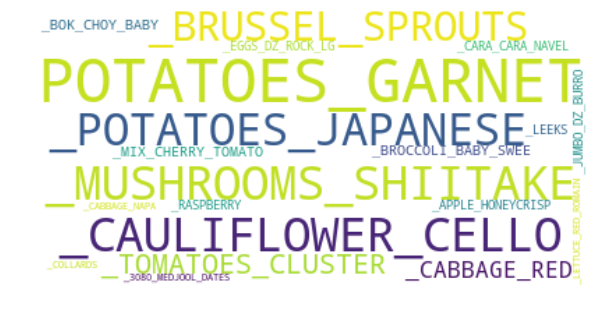

Topic #1:
['CRV 12PACK SMLL T', 'APPLES PINK LADY', 'POTATOES RUSSET', 'SQUASH BUTTERNUT', 'LACROIX GRPFRT12pk', 'SMALL REF CRV TAX', 'MANGO', 'PEPPERS GREEN BELL', 'STRAUS MILK 64oz', 'eggs clover lg dz', '2890RICE CRACKERS', 'ARUGULA LOOSE', 'GRATED PARMESAN', 'LACROIX TNGRN12pk', 'MILD CHEDDAR CHEES', '6265 OG W BASMATI', '8106 CHAMOMILE ORG', '6087VEGAN RAVIOLI', '2432 EQUAL EX COFF', '3715 GOJI GRANOLA']


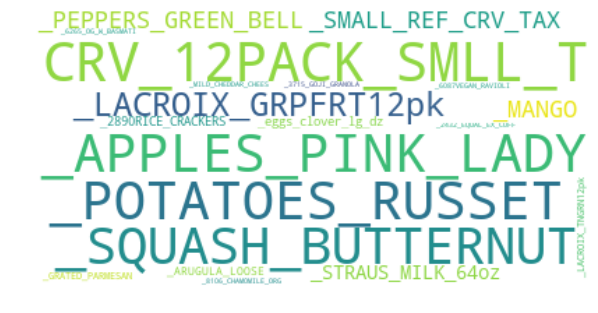

Topic #2:
['POTATOES RUSSET', '2580 NUTRI YEAST', '8571 TURM PWD ORG', 'PARMIGIANO REGG', '4105 QUICK OATS', '8087 CARD PWD OG', 'WILDWOOD 16oz TOFU', '8237 ORG GINGER PW', 'DISH LIQUID 25oz', '2863 BTR CHOC CHIP', 'BRAGG LQD AMNO16oz', '8423 PAPRIKA ORG', 'STRAU GREEK YOGURT', '2124 OG CHANA DAL', 'BC BLUEBERRY YOGUR', 'BC STRAWBERRY YOGU', 'BC PEACH YOGURT', 'BC VANILLA YOGURT', 'ORG COTTAGE CHEESE', 'SALTED BUTTER']


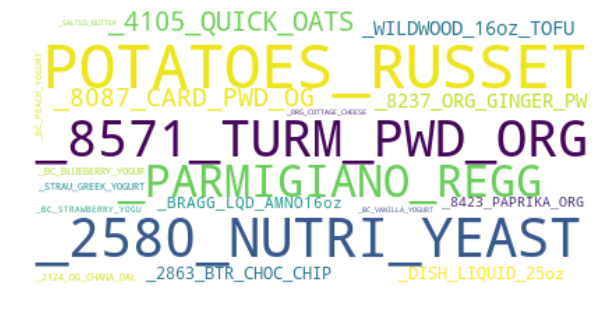

Topic #3:
['TOMATO MIX HEIRLOO', 'LEMONS MEYER', 'RASPBERRY', 'APPLES GALA', 'PEPPERS ORANGE BEL', 'BRUSSEL SPROUTS', '2448 CASTEL OLIVE', 'PEPPERS YELLOW BEL', 'LETTUCE ROMAINE', '6PACK BEER SMALL C', 'STRAWBERRY 1LB PKG', 'WHOLE ORG MILK', 'TANGELO MINNEOLA', 'EGGPLANT GLOBE', 'TOMATOES CLUSTER', '6985 OLIVEANTIPAST', 'LEMONGRASS', 'SPINACH BUNCHED', 'SPROUTS MICRO GREE', 'SPROUTED FIRM TOFU']


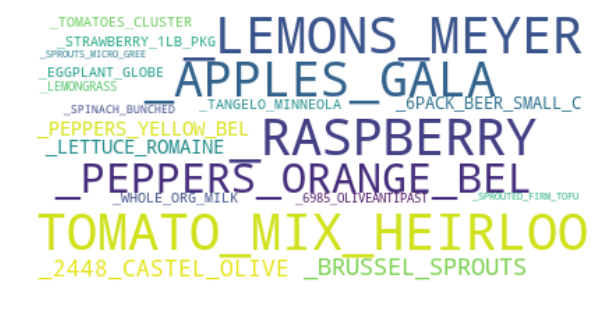

Topic #4:
['APPLES PINK LADY', 'PEPPERS ORANGE BEL', 'PEPPERS YELLOW BEL', 'TILLY SHARP CHEDDA', '3680 BAKERS CH FLO', '32OZ BIO TUB t5', 'GREEN ONIONS', 'ORG FLOUR TORT', 'SNO CORN', 'CLO UNSALTED BUTTE', 'DICED TOMS NO SALT', 'New Zealand Chedda', 'CINNAMON ROLLS', 'POTATOES RED', 'MUIR FIRE RSTD TOM', '4141 MULTI POPCORN', 'FLAKY BISCUIT', 'AH DIST GALLON', '8129 CINN STIX ORG', '2245 ORG CNLNI BN']


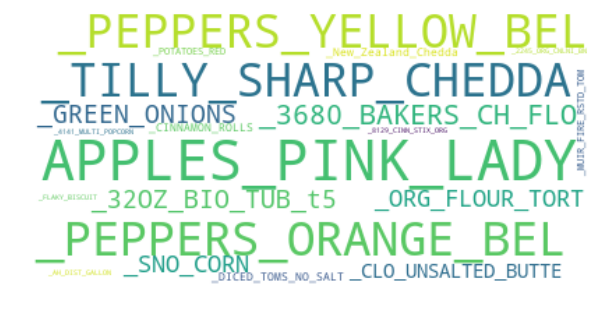

Topic #5:
['PARSLEY ITALIAN', 'SHALLOTS', 'HERBS BUNCH', 'GRAPEFRUIT', 'LEEKS', 'LEMONS MEYER', 'KIWI LOOSE', 'LIL GEM LETTUCE', '2448 CASTEL OLIVE', 'RADDICHIO', 'ORANGES BLOOD', 'ORG 1LB BUTTER', 'CLEMENTINE TANGERI', 'ROOTS PARSNIP', 'BEETS RED LOOSE', 'FENNEL', 'AVOCADO FUERTE', 'DILL', 'FRISEE', 'CELLO CAULIFLOWER']


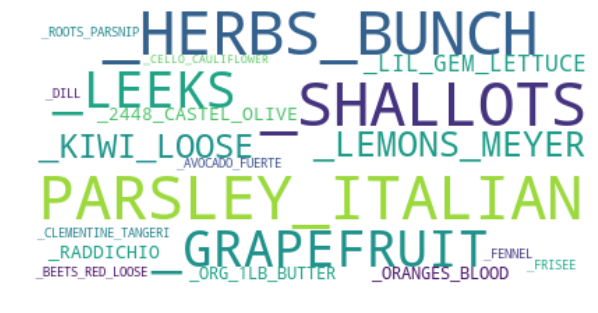

Topic #6:
['PEAR BOSC', 'CHARD RED', 'STRAWBERRY 1LB PKG', 'KIWI LOOSE', 'EGGS CLOVR PASTURE', 'BRUSSEL SPROUTS', 'GREEN CHARD', 'GRAPEFRUIT', 'APPLE HONEYCRISP', 'BEETS RED LOOSE', 'ORG WM QT CLOVER', 'MANGO ATAULFO', 'POTATOES JEWEL', 'COLLARDS', 'APPLES PINK LADY', '7772 ALMOND BUTTR', 'CARA CARA NAVEL', '6PACK BEER SMALL C', 'ORGANIC 2% MILK', '6020 FRESH RAVIOLI']


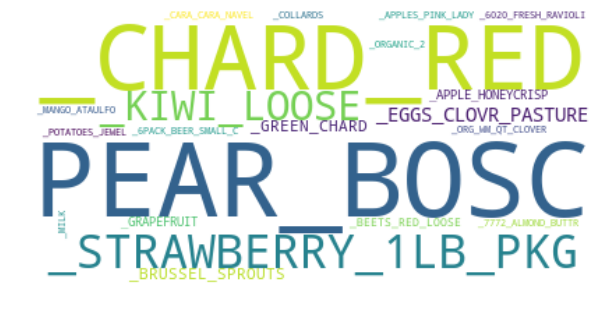

Topic #7:
['TOMATOES ROMA', 'CABBAGE GREEN', 'APPLES GALA', 'CLEMENTINE TANGERI', 'CAULIFLOWER CELLO', 'EGGPLANT GLOBE', 'POTATOES JEWEL', 'PEPPERS GREEN BELL', 'ORG Y CORN TORT', 'ONIONS WHITE', 'EDEN BLACKBEANS 15', 'HERBS BUNCH', 'BEETS RED BUNCHED', 'SQUASH SPAGHETTI', 'STRAUS BUTTER SWT', 'WHOLE ORG MILK', 'CUCUMBERS ENGLISH', 'GREEN ONIONS', 'AVOCADO FUERTE', '6905 WHITE SUGAR']


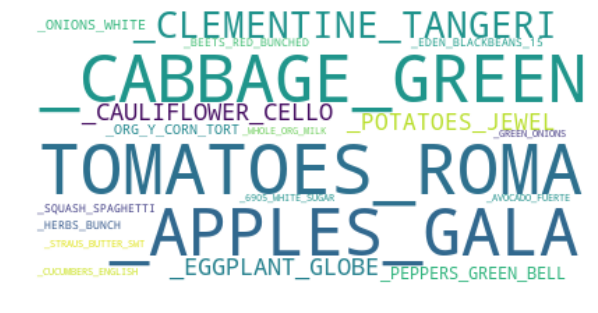

Topic #8:
['5290 WALNUTS', '3290 THOMPSON RAIS', '5250 ORG PECAN HA', '6PACK BEER SMALL C', '5120 ORG ALMONDS', '6905 WHITE SUGAR', 'CAULIFLOWER CELLO', '2985 CRISPED RICE', '4105 QUICK OATS', 'ORG Y CORN TORT', 'LETTUCE RED BUTTER', 'CASA SANCHEZ MILD', 'ORG WHEAT TORTILLA', 'STRAUS BUTTER SWT', 'SPROUTED FIRM TOFU', 'LETTUCE RED LEAF', '6423 WHT SUSHI RIC', '2499 MALDON SALT', '3144 OG DR CRANBER', 'ACME WHEAT WALNUT']


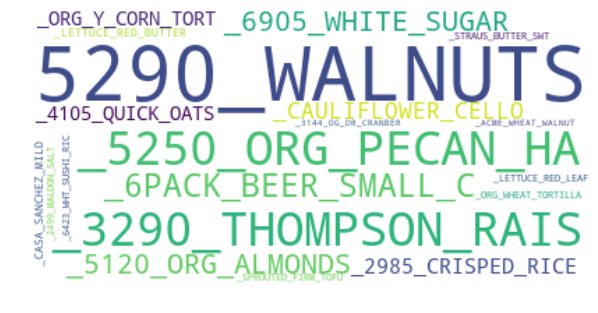

Topic #9:
['ARUGULA LOOSE', 'PARMIGIANO REGG', '3680 BAKERS CH FLO', 'CABBAGE RED', '32OZ BIO TUB t5', 'JUMBO DZ BURRO', '2238 HIMA PINK SAL', 'SIGHT GLASS', 'NAT VAL WALNUT SPO', '8446 PEPPERTELLCHR', '6090 FRESH RAVIOLI', 'Volume Shampoo 12o', '2216ORG BELUGA LNT', 'KERRYGOLD UN', 'CREME FRAICHE', 'EcoDent Gentle Flo', '3085 ZAHIDI DATES', 'PEPERMINT HAND SOA', 'ST BEN PLN 23OZ', 'WF Peppermint TP']


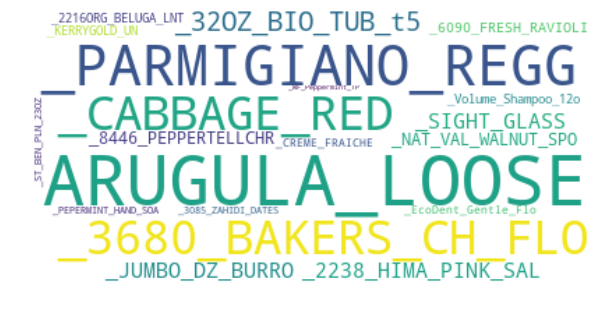

In [245]:
def print_top_items(model, feature_names, n_top_words):
    topics =[]
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        #topic_string=(" ".join([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_string=str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

        topics.append(topic_string)
        print(topic_string)
        #print()
        wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(topic_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)
print_top_items(model,list(items_set),20)

In [246]:
df['items'][1116]

[['', 'CLARAVALE COW MILK', 5.69, 13],
 ['DP', 'BOTTLE DEPOSIT', 2.0, 21],
 ['', 'BELLA CAPRA CHEVRE', 5.98, 14],
 ['', 'BAKERY', 2.99, 17],
 ['', 'BAKERY', 3.99, 17]]

In [247]:
def print_basket_contents(basket_id):
    basket=[]
    #print('+++++++++++++++++++++++next basket+++++++++++++++++')
    for items in df['items'][basket_id]:
        #for item in items:
        print("item:",items)
    #return basket
#print_basket_contents(1116)

In [249]:
def print_top_baskets(model, W, n_top_words):
    baskets = []
    for topic_idx, w in enumerate(W.T):
        basket_string=str([df['items'][i] for i in w.argsort()[:-n_top_words - 1:-1]])
        print(w.argsort()[:-n_top_words - 1:-1])
        count = 0
        for i in w.argsort()[:-n_top_words - 1:-1]:
            count+=1
            print("++++++++++++++++++Topic #%d, basket #%d+++++++++++++++++++"%(topic_idx,count))
            print_basket_contents(i)
        #print_basket_contents([i for i in w.argsort()[:-n_top_words - 1:-1]])
        baskets.append(basket_string)
        #print(basket_string)
        #print()
        '''wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(basket_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)'''
print_top_baskets(model,W,10)

[ 652   63  954  314 2407  604 1125  447  581  845]
++++++++++++++++++Topic #0, basket #1+++++++++++++++++++
item: ['', 'Fragrance Free Sha', 8.1, 4]
item: ['', 'Fragrance Free Con', 8.1, 4]
item: ['', 'UP Beanie', 30.0, 4]
item: ['MP', 'BAG CREDIT', -0.1, 23]
item: ['', 'Nordic OmegaVision', 39.96, 1]
item: ['', 'IL CASOLARE OLVE O', 13.99, 15]
item: ['', 'LETTUCE RED ROMAIN', 2.99, 12]
item: ['', 'SPINACH LOOSE', 6.31, 12]
item: ['', 'MUSHROOMS SHIITAKE', 9.74, 12]
item: ['', 'RASPBERRY', 6.99, 12]
item: ['', 'SQUASH ZUCCHINI', 6.9, 12]
item: ['', 'PEPPERS ORANGE BEL', 1.76, 12]
item: ['', 'BANANAS', 2.5700000000000003, 12]
item: ['', 'BLACKBERRY PKG', 5.99, 12]
item: ['', 'EGGS ALEX KID 6PAC', 5.79, 13]
item: ['', 'TOMATOES CLUSTER', 2.87, 12]
item: ['', 'AVOCADOS HASS', 2.03, 12]
item: ['', 'UNSALTED ORGANIC P', 8.49, 15]
item: ['', 'UNSALTED ORGANIC P', 8.49, 15]
item: ['', 'POTATOES GARNET', 7.4, 12]
item: ['', '5290 WALNUTS', 25.28, 16]
item: ['', 'OV PLAIN YOGURT', 4.99, 13]
it

In [71]:
W[:,1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.90617938e-06, 2.20951407e-06, 0.00000000e+00])

In [74]:
n_top_words=10
for i,w in enumerate(W.T):
    print(i,w.argsort()[:-n_top_words - 1:-1])

0 [2484 2136  206 1022 2130 1465  456  168  272  144]
1 [ 116 1239 1090  326 1093 1938 1919 2311 1273 2116]
2 [1159 1189  383  722 1864 1368 1391 1136  537  314]
3 [2134 2142 2132 1946 1326 1491 2256  798 1593 1994]
4 [ 209  202 2481 2486 1566  289 2207 1272  307  793]
5 [2400  447 1231 1804 2372 1210  817  808  688 2081]
6 [ 911 1696 1927 1086 1285  131 1265 1322  700  672]
7 [2278 2094 2129 2133 2236 2242 2089 2454  161 2481]
8 [ 422 1025 1018  735  447 1589 2129 2133 1698  237]
9 [ 525  238  239 1284 2454  115 2396 2150 1942 1559]


In [76]:
len(list(items_set))

6576

In [75]:
for topic in H:
    print (topic.argsort()[:-10-1:-1])

[1752 6585 2198 2188 2189 2190 2191 2192 2193 2194]
[1271 6539 4820   80 4966 1929 2604 6546 2660 4806]
[6114 3455  640 2958  537   84 2189 4025 1017 4051]
[3058 2646 2476 5751 5768 6309 4302 4243 3450 6388]
[1484 4994 5017  125 4381  102 1207  435 1811 4079]


In [ ]:
feat
str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

In [72]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            print (it[1],it[2])

4112 SINTO KIMCHI 13.54
PEPPERS RED BELL 2.75
CUCUMBERS 12.73
ORGANIC 2LB TOFU 20.95
5540 TAHINI 12.17
GINGER 4.79
GARLIC WHITE 3.01
PRODUCE SCALE 1.79
LIMES 2.0
CILANTRO 1.99
CILANTRO 1.99
BROCCOLI LOOSE 6.24
CELLO CAULIFLOWER 11.96
LEEKS 9.12
SUGAR PLUM CLAM 5.97
BEETS RED LOOSE 6.01
store 100% Bulks -34.5
store 100% Produce -70.35
store 100% Refrig -20.95


In [12]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df['CILANTRO'][10:11]

10    3.98
Name: CILANTRO, dtype: float64

In [19]:
df.shape[0]
for i in range(1,df.shape[0]):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df.shape

(2535, 6586)

In [22]:
df.to_pickle('02012019.pkl')

In [213]:
len(items_set)

6576

In [114]:
trans = []
for a in df[1:2]['items']:
    #trans.append([r for v in a for r in v])
    trans.append(a)
print(a)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]


In [96]:
trans =[]
for l in [i for i in df[1:2]['items']]:
    print (l)
    trans.append(l)
    print (trans)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]
[[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]]


In [4]:
#pd.get_dummies([i for i in df[1:2]['items']]).values()

In [80]:

type(df['items'].values)
count=0
for document in df['items'][1]:
    print (document)
    
    for word in(document):
        count+=1
        print (count,word)
        '''for letter in str(word):
            print (letter)'''

['', 'BLUEBERRIES', 5.99, 12]
1 
2 BLUEBERRIES
3 5.99
4 12
['', 'ALXNDRE YOGURT', 4.99, 13]
5 
6 ALXNDRE YOGURT
7 4.99
8 13
['MP', 'Worker 20% Produce', -1.2, 12]
9 MP
10 Worker 20% Produce
11 -1.2
12 12
['MP', 'Worker 20% Refrig', -1.0, 13]
13 MP
14 Worker 20% Refrig
15 -1.0
16 13


NameError: name 'plt' is not defined

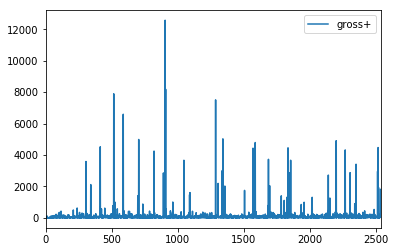

In [51]:
df[['gross+','time']].plot()
plt.show()

In [33]:
ff= './tlogs/201902'
if ff.startswith("./tlogs"):
    print ("yep")

yep


In [18]:
for f in os.walk('./tlogs'): print ("f:",f,"sub:",sub)


f: ('./tlogs', ['201902'], ['.DS_Store']) sub: []
f: ('./tlogs/201902', ['20190202', '20190203', '20190204', '20190205', '20190206', '20190207', '20190208', '20190209', '20190210', '20190211', '20190212', '20190213', '20190214', '20190215', '20190216', '20190217', '20190218', '20190219', '20190220', '20190221', '20190222', '20190223', '20190224', '20190225', '20190226', '20190227', '20190228', '20190301'], ['.DS_Store']) sub: []
f: ('./tlogs/201902/20190202', [], ['checklisting.txt', 'department.txt', 'Department01Discounts.txt', 'Department04Discounts.txt', 'Department06Discounts.txt', 'Department07Discounts.txt', 'Department08Discounts.txt', 'Department09Discounts.txt', 'Department10Discounts.txt', 'Department11Discounts.txt', 'Department12Discounts.txt', 'Department13Discounts.txt', 'Department14Discounts.txt', 'Department15Discounts.txt', 'Department16Discounts.txt', 'Department17Discounts.txt', 'Department19Discounts.txt', 'Department26Discounts.txt', 'dept.txt', 'discountitems.tx

In [ ]:
import os

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".asm"):
            print (filepath)

In [8]:
df=pd.read_pickle('02012019.pkl')

In [10]:
df[df['BANANAS']!=0]

,date,gross+,gross-,items,net,oper,term,time,trans,type,...,PRO BAR MINT CHOC,8213 FENNEL POWDER,OR Cooked Beets,JR Melatonin SR 12,NUT WALNUT,QT Elderbry Loz 36,SW WB Vanilla 12pk,6556 DUTCH COCOA,lvngClyBntonte 8oz,CARDAMOM BITTERS
36,2001-02-19,37.65,0.00,"[[, PASCHA UNSWT CCHIP, 4.99, 15], [, PRIMAVER...",37.65,104,5,09:16,8,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2001-02-19,108.17,0.00,"[[, FORGER PL CSH YOG, 5.59, 13], [, SO DEL UN...",108.17,42,6,09:20,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2001-02-19,20.72,0.00,"[[, APPLES FUJI, 2.42, 12], [, 8308KEEMUN BLAC...",20.72,11,1,09:27,7,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2001-02-19,144.42,0.00,"[[, WOODSTK BLUEBERRIE, 6.29, 19], [, EVOLUTIO...",144.42,42,6,09:30,17,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,2001-02-19,17.69,0.00,"[[, COELA ZIPPER TOTE, 9.99, 6], [, BANANAS, 2...",17.69,42,6,09:31,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,2001-02-19,224.03,0.00,"[[, APPLE JUICE, 11.39, 15], [, ORG GAL CLOVER...",224.03,104,5,09:32,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,2001-02-19,80.01,0.00,"[[, MAC HAWAI SEA SALT, 7.99, 15], [, UMLAUT C...",80.01,42,6,09:35,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2001-02-19,86.51,0.00,"[[, FLAVORG VANILLA4oz, 15.49, 15], [, SUGAR P...",86.51,34,8,09:39,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2001-02-19,285.53,0.00,"[[, VH Kids Vibe Choc, 34.4, 1], [, EZ Ultimat...",285.53,11,1,09:40,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,2001-02-19,55.73,0.00,"[[, QRT CAN JAR t101, 1.79, 6], [, QRT CAN JAR...",55.73,42,6,09:41,25,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


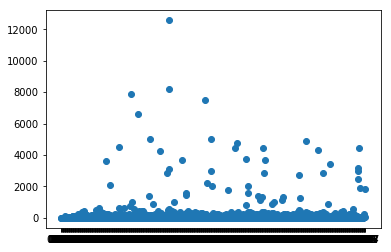

In [259]:
plt.scatter(x=df['time'],y=df['gross+'])

In [5]:
ac = [" Account   4008"]

In [34]:
ac[0][-4]

'4'